In [28]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style

style.use("fivethirtyeight")

In [6]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"TSLA.csv")

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
#Make two new cloumns which be used for making predictions
df["HL_Perc"] = (df["High"] - df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [12]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [13]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [14]:
#Define the lab column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
2411,3.356146,-0.279682,566.900024,11788500,NaN
2412,3.942336,0.920632,580.989990,17801500,NaN
2413,5.320389,1.326652,640.809998,29005700,NaN
2414,3.237839,1.651564,650.570007,15719300,NaN
2415,16.721106,15.780255,780.000000,47065000,NaN


In [16]:
#Make fetaure and label arrays
x = np.array(df.drop(["PriceNextMonth"],1))
x = preprocessing.scale(x)
x_Check = x[-30:]
x = x[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
#Divide the data set into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [19]:
#Define the prediction model
model = RandomForestRegressor()

In [21]:
#Fit the model using training data
model.fit(x_train, y_train)

RandomForestRegressor()

In [23]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(x_test, y_test)
print(conf)

0.9174845995699622


In [24]:
#Fit the model again using the whole data set
model.fit(x, y)

RandomForestRegressor()

In [25]:
predictions = model.predict(x_Check)

In [32]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns = ["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]

#This is the final DaaFrame
result = pd.concat(var)

Text(0, 0.5, 'Price')

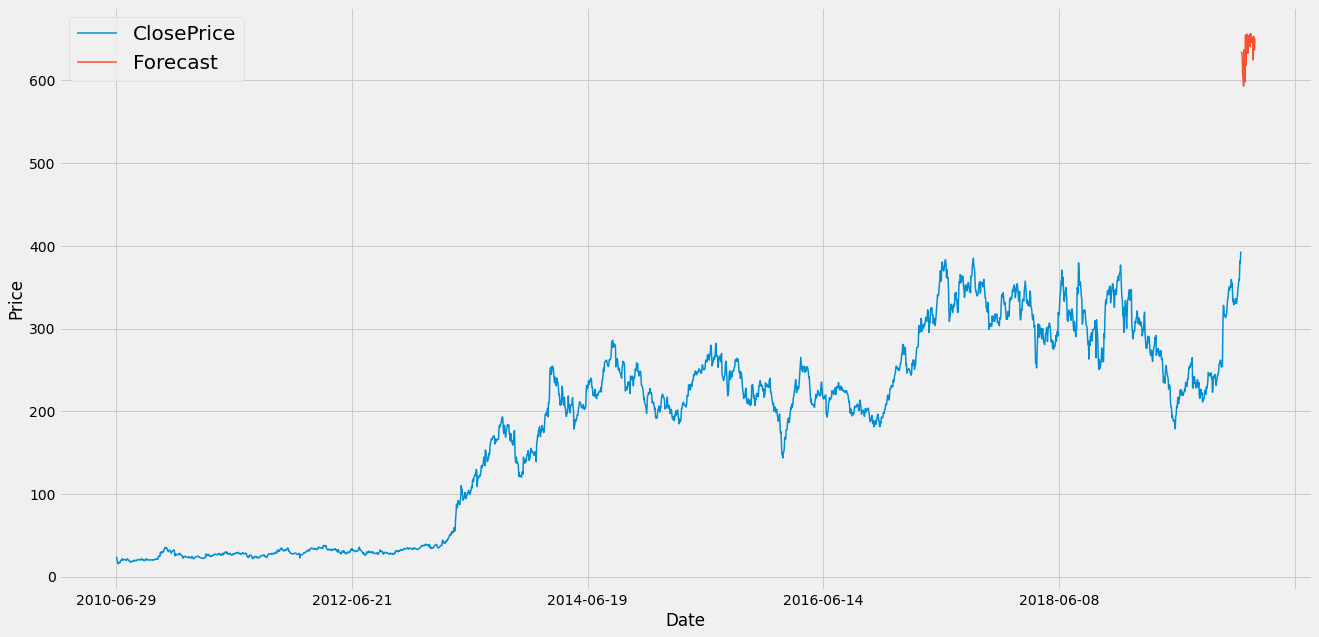

In [37]:
#Plot the final results
result.plot(figsize = (20,10), linewidth = 1.5)
plt.legend(loc = 2, prop = {'size':20})
plt.xlabel('Date')
plt.ylabel('Price')